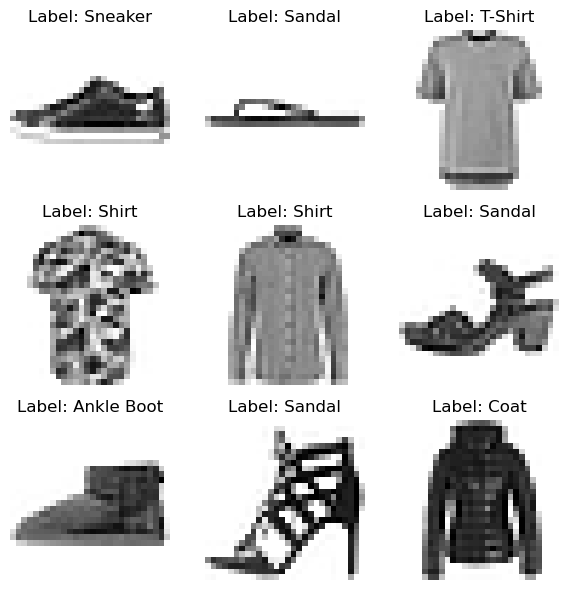

In [5]:
from keras.datasets import fashion_mnist
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()



X_train_full.shape
import matplotlib.pyplot as plt 
import random as rd
import numpy as np

classes = ["T-Shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

def plot_digits(X, y):
    fig, axes = plt.subplots(3, 3, figsize=(6, 6))
    indices = rd.sample(range(X.shape[0]), 9)
    for i, ax in enumerate(axes.flat):
        image_array = np.array(X[indices[i]])
        digit_array = image_array.reshape(28, 28)
        # negative_array = 255 - digit_array  # Compute negative of the image
        ax.imshow(digit_array, cmap="binary")
        ax.axis("off")
        ax.set_title("Label: {}".format(classes[y[indices[i]]]))

    plt.tight_layout()
    plt.show()

plot_digits(X_train_full, y_train_full)

In [121]:

X_valid, X_train = X_train_full[50000:]/255, X_train_full[:50000]/255
y_valid, y_train = y_train_full[50000:], y_train_full[:50000]
X_test = X_test / 255


In [123]:
import multiprocessing
num_processes = multiprocessing.cpu_count()


nnm = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax"),
])
# nnm.summary()
#from keras.optimizers import SGD
#optimizer=SGD(learning_rate=0.01)
nnm.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
# weights,biases = nnm.layers[1].get_weights()
history = nnm.fit(X_train,y_train,epochs=5,batch_size=32,validation_data=(X_valid,y_valid))

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.7530 - accuracy: 0.7520 - val_loss: 0.5738 - val_accuracy: 0.8019
Epoch 2/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4985 - accuracy: 0.8271 - val_loss: 0.4902 - val_accuracy: 0.8297
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4529 - accuracy: 0.8406 - val_loss: 0.4484 - val_accuracy: 0.8428
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4246 - accuracy: 0.8517 - val_loss: 0.4236 - val_accuracy: 0.8497
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4046 - accuracy: 0.8580 - val_loss: 0.4291 - val_accuracy: 0.8445


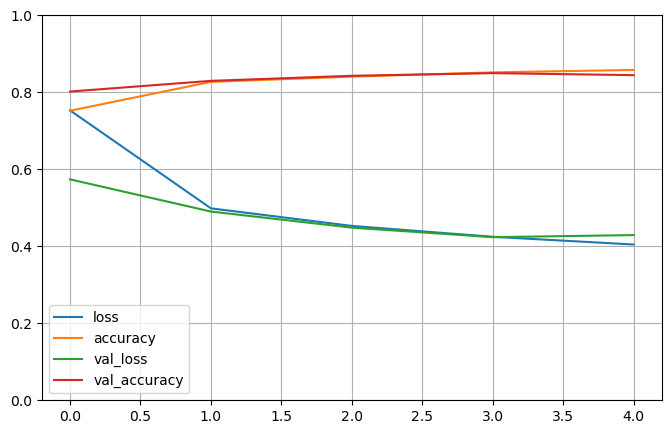

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# history.epoch
# history.history

Epoch 1/30
1563/1563 [==============================] - 2s 2ms/step - loss: 0.2271 - accuracy: 0.9188 - val_loss: 0.3160 - val_accuracy: 0.8886
Epoch 2/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2242 - accuracy: 0.9203 - val_loss: 0.3290 - val_accuracy: 0.8870
Epoch 3/30
1563/1563 [==============================] - 2s 2ms/step - loss: 0.2190 - accuracy: 0.9225 - val_loss: 0.3208 - val_accuracy: 0.8863
Epoch 4/30
1563/1563 [==============================] - 2s 2ms/step - loss: 0.2162 - accuracy: 0.9225 - val_loss: 0.3236 - val_accuracy: 0.8847
Epoch 5/30
1563/1563 [==============================] - 2s 2ms/step - loss: 0.2126 - accuracy: 0.9258 - val_loss: 0.3250 - val_accuracy: 0.8872
Epoch 6/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2100 - accuracy: 0.9242 - val_loss: 0.3095 - val_accuracy: 0.8911
Epoch 7/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2064 - accuracy: 0.9267 - val_loss: 0.3310 - val_accuracy:

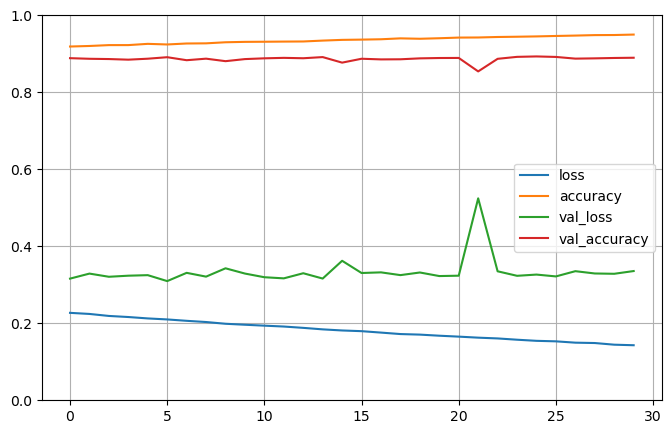

In [ ]:
"""history2 = nnm.fit(X_train,y_train,epochs=30,batch_size=32,validation_data=(X_valid,y_valid))

pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()"""

In [125]:
nnm.evaluate(X_test,y_test)
nnm.predict(X_test[:3]).round(2)

1/1 [==============================] - 0s 63ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.12, 0.  , 0.81],
       [0.  , 0.  , 0.98, 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)